In [ ]:
%cd ..

# Loading in trained Models and Evaluation

In [2]:
from mhnreact.inspect import *

In [8]:
list_models()

{0: 'USPTO_sm_segler_valloss4.636_rerun_1632235515.pt',
 1: 'USPTO_sm_segler_valloss4.656_rerun_1632299812.pt',
 2: 'USPTO_sm_fortunato_valloss4.404_rerun_1632299982.pt',
 3: 'USPTO_sm_segler_valloss4.530_rerun_1631956231.pt',
 4: 'USPTO_sm_mhn_valloss4.104_rerun_1632052784.pt',
 5: 'USPTO_sm_mhn_valloss5.716_rerun_1631972303.pt',
 6: 'USPTO_50k_mhn_valloss0.008_retro_selected_1632315904.pt',
 7: 'USPTO_sm_mhn_valloss3.244_rerun_1632300484.pt',
 8: 'USPTO_sm_segler_valloss4.636_rerun_1632236265.pt',
 9: 'USPTO_sm_mhn_valloss4.767_rerun_1632052390.pt',
 10: 'USPTO_sm_fortunato_valloss5.375_rerun_1631956793.pt',
 11: 'USPTO_sm_segler_valloss5.963_rerun_1632236883.pt',
 12: 'USPTO_sm_mhn_valloss3.333_rerun_1632318117.pt',
 13: 'USPTO_sm_segler_valloss4.636_rerun_1632235747.pt',
 14: 'USPTO_sm_segler_valloss4.636_rerun_1632236717.pt',
 15: 'USPTO_50k_mhn_valloss4.273_retro_selected_1632127007.pt',
 16: 'USPTO_sm_segler_valloss4.636_rerun_1632236028.pt',
 17: 'USPTO_sm_mhn_valloss3.485_reru

In [9]:
clf = load_clf(list_models()[12], model_type='mhn', device='cpu')

{'fingerprint_type': 'morgan', 'template_fp_type': 'rdk', 'num_templates': 9162, 'fp_size': 4096, 'fp_radius': 2, 'device': 'cpu', 'batch_size': 1024, 'pooling_operation_state_embedding': 'mean', 'pooling_operation_head': 'max', 'dropout': 0.2, 'lr': 0.001, 'optimizer': 'Adam', 'activation_function': 'ReLU', 'verbose': False, 'hopf_input_size': 4096, 'hopf_output_size': None, 'hopf_num_heads': 1, 'hopf_asso_dim': 1024, 'hopf_association_activation': 'None', 'hopf_beta': 0.03, 'norm_input': False, 'norm_asso': True, 'hopf_n_layers': 0, 'mol_encoder_layers': 1, 'temp_encoder_layers': 1, 'encoder_af': 'ReLU', 'hopf_pooling_operation_head': 'mean'}
loading templates+noise


In [10]:
clf

MHN(
  (mol_encoder): FPMolEncoder(
    (af): ReLU()
    (norm_out): LayerNorm((1024,), eps=1e-05, elementwise_affine=False)
    (W_0): Linear(in_features=4096, out_features=1024, bias=True)
    (dropout): Dropout(p=0.2, inplace=False)
  )
  (template_encoder): TemplateEncoder(
    (af): ReLU()
    (norm_out): LayerNorm((1024,), eps=1e-05, elementwise_affine=False)
    (W_0): Linear(in_features=4096, out_features=1024, bias=True)
    (dropout): Dropout(p=0.2, inplace=False)
  )
  (softmax): Softmax(dim=1)
  (lossfunction): CrossEntropyLoss()
  (pretrain_lossfunction): BCEWithLogitsLoss()
)

In [11]:
from mhnreact.data import load_USPTO
X,y = load_USPTO('sm')

train 29816 samples ( 9161 max label)
valid 4482 samples ( 9157 max label)
test 5959 samples ( 9145 max label)


In [12]:
preds = clf.forward_smiles(X['test'])

In [13]:
from mhnreact.utils import top_k_accuracy
top_k_accuracy(y_true=y['test'], y_pred=preds, k=[1,2,3,5,10,20,50,100])

[array(0.40677965, dtype=float32),
 array(0.5252559, dtype=float32),
 array(0.5811378, dtype=float32),
 array(0.64826316, dtype=float32),
 array(0.7190804, dtype=float32),
 array(0.7736197, dtype=float32),
 array(0.831851, dtype=float32),
 array(0.87028027, dtype=float32)]

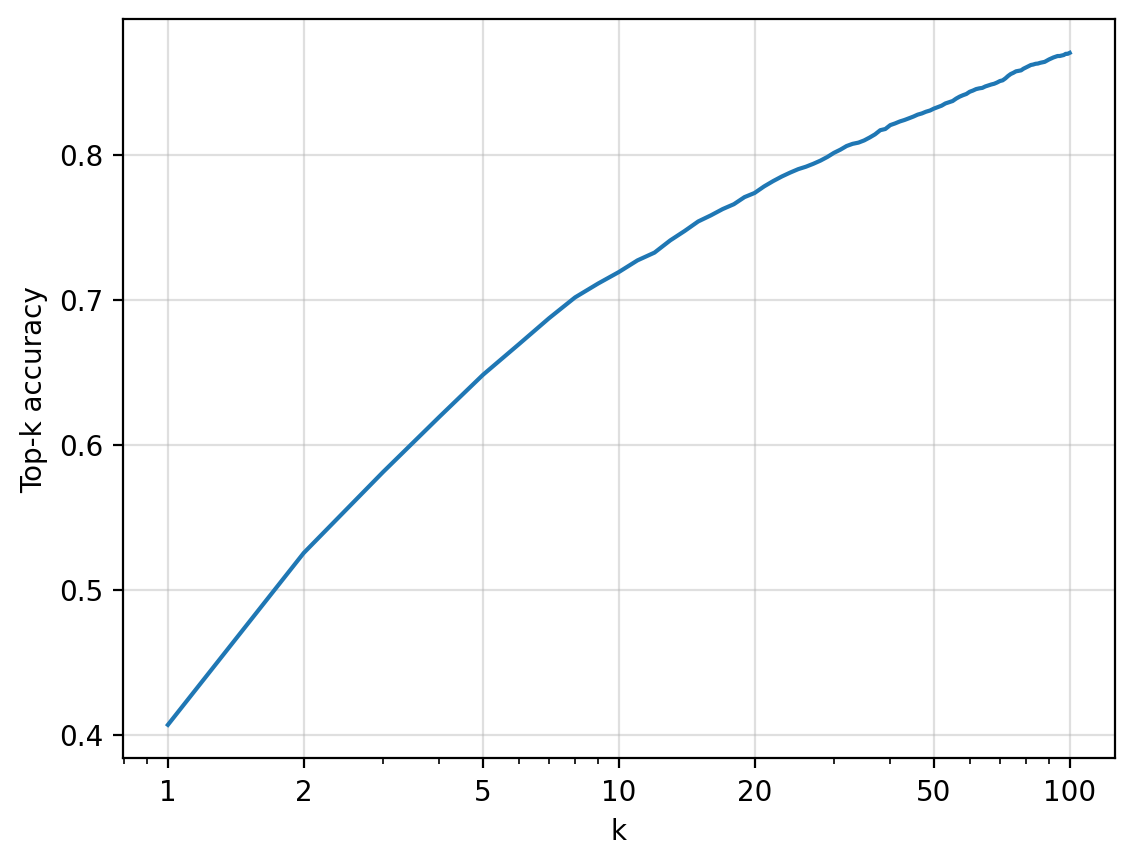

In [14]:
import matplotlib.pyplot as plt
ks = range(1,101)
plt.plot(ks, top_k_accuracy(y_true=y['test'], y_pred=preds, k=ks))
plt.xlabel('k')
plt.ylabel('Top-k accuracy')
plt.xscale('log')
plt.grid('on',alpha=0.4)
tks = [1,2,5,10,20,50,100]
plt.xticks(tks, tks);

In [15]:
import os
import pandas as pd
fns = os.listdir('./data/experiments/')
df = pd.concat([pd.read_csv(f'./data/experiments/{fn}',sep='\t') for fn in fns])

In [ ]:
df